In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

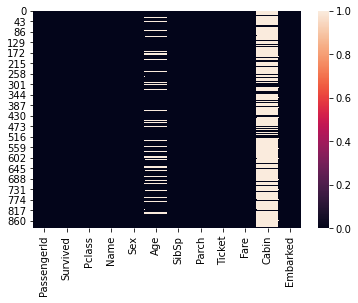

In [8]:
sns.heatmap(df.isnull())

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
df.drop(columns=['Cabin'],inplace=True)

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked'].fillna('S',inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

# Changing the Datatypes which are Integer via astype method

In [16]:
df['Age']=df['Age'].astype('int')

In [17]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


In [20]:
dfcor=df.corr()
dfcor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033741,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500
Age,0.033741,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000


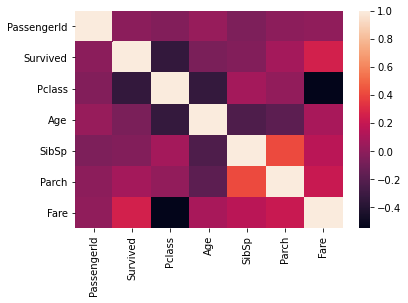

In [21]:
sns.heatmap(dfcor)

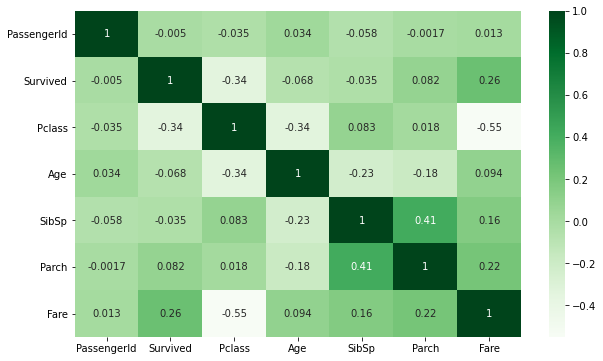

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap="Greens",annot=True)

out of 891 62.0 percent people died in the accident


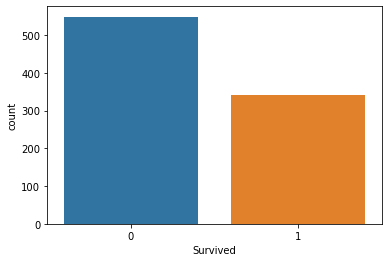

In [23]:
sns.countplot(df['Survived'])
death_percent=round((df['Survived'].value_counts().values[0]/891)*100)
print ('out of 891 {} percent people died in the accident'.format(death_percent))

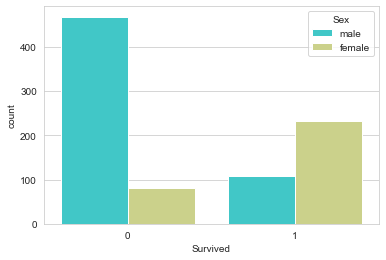

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow')

# Conclusion:-

1.Among the died peoples group most of them are males. 2.Less Females died. 3.In Survived Peoples group most of them are Females.

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


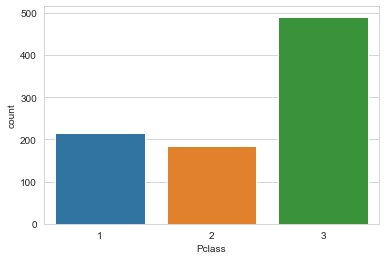

In [25]:
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(df['Pclass'])

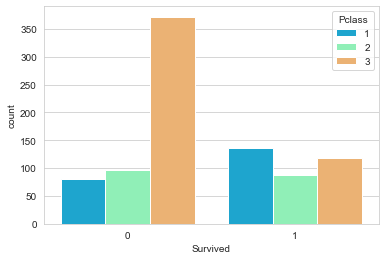

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

male      64.758698
female    35.241302
Name: Sex, dtype: float64


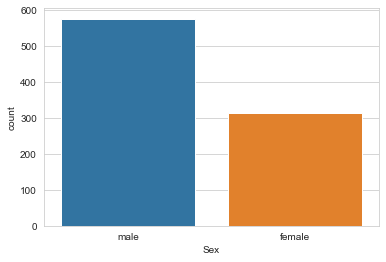

In [27]:
print((df['Sex'].value_counts()/891)*100)
sns.countplot(df['Sex'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


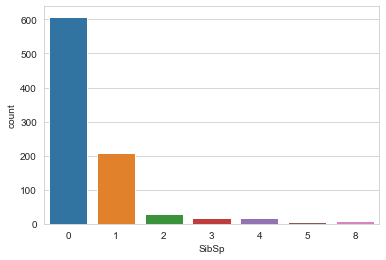

In [28]:
print(df['SibSp'].value_counts())
sns.countplot(df['SibSp'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


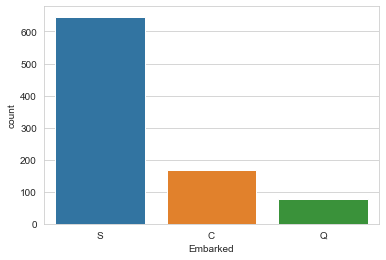

In [29]:
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(df['Embarked'])

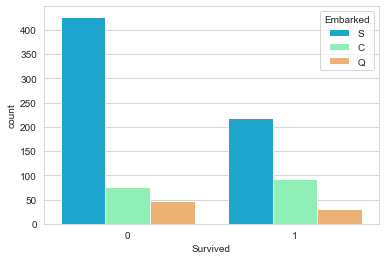

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=df,palette='rainbow')

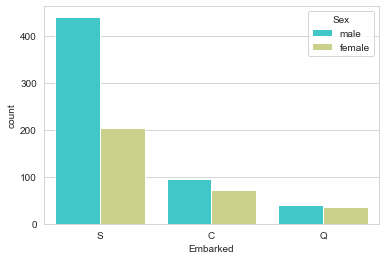

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Sex',data=df,palette='rainbow')

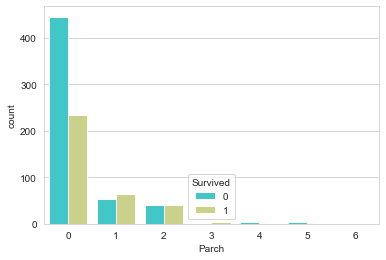

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',hue='Survived',data=df,palette='rainbow')

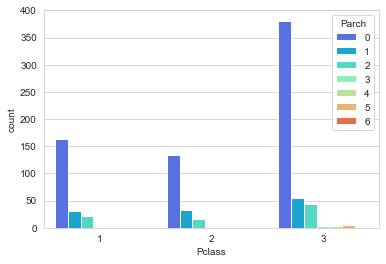

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Parch',data=df,palette='rainbow')

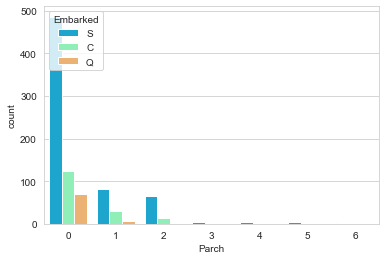

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',hue='Embarked',data=df,palette='rainbow')

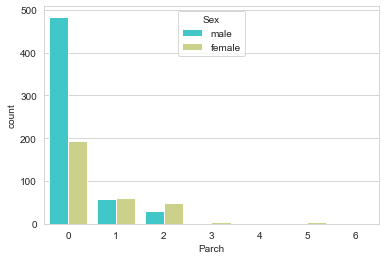

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',hue='Sex',data=df,palette='rainbow')

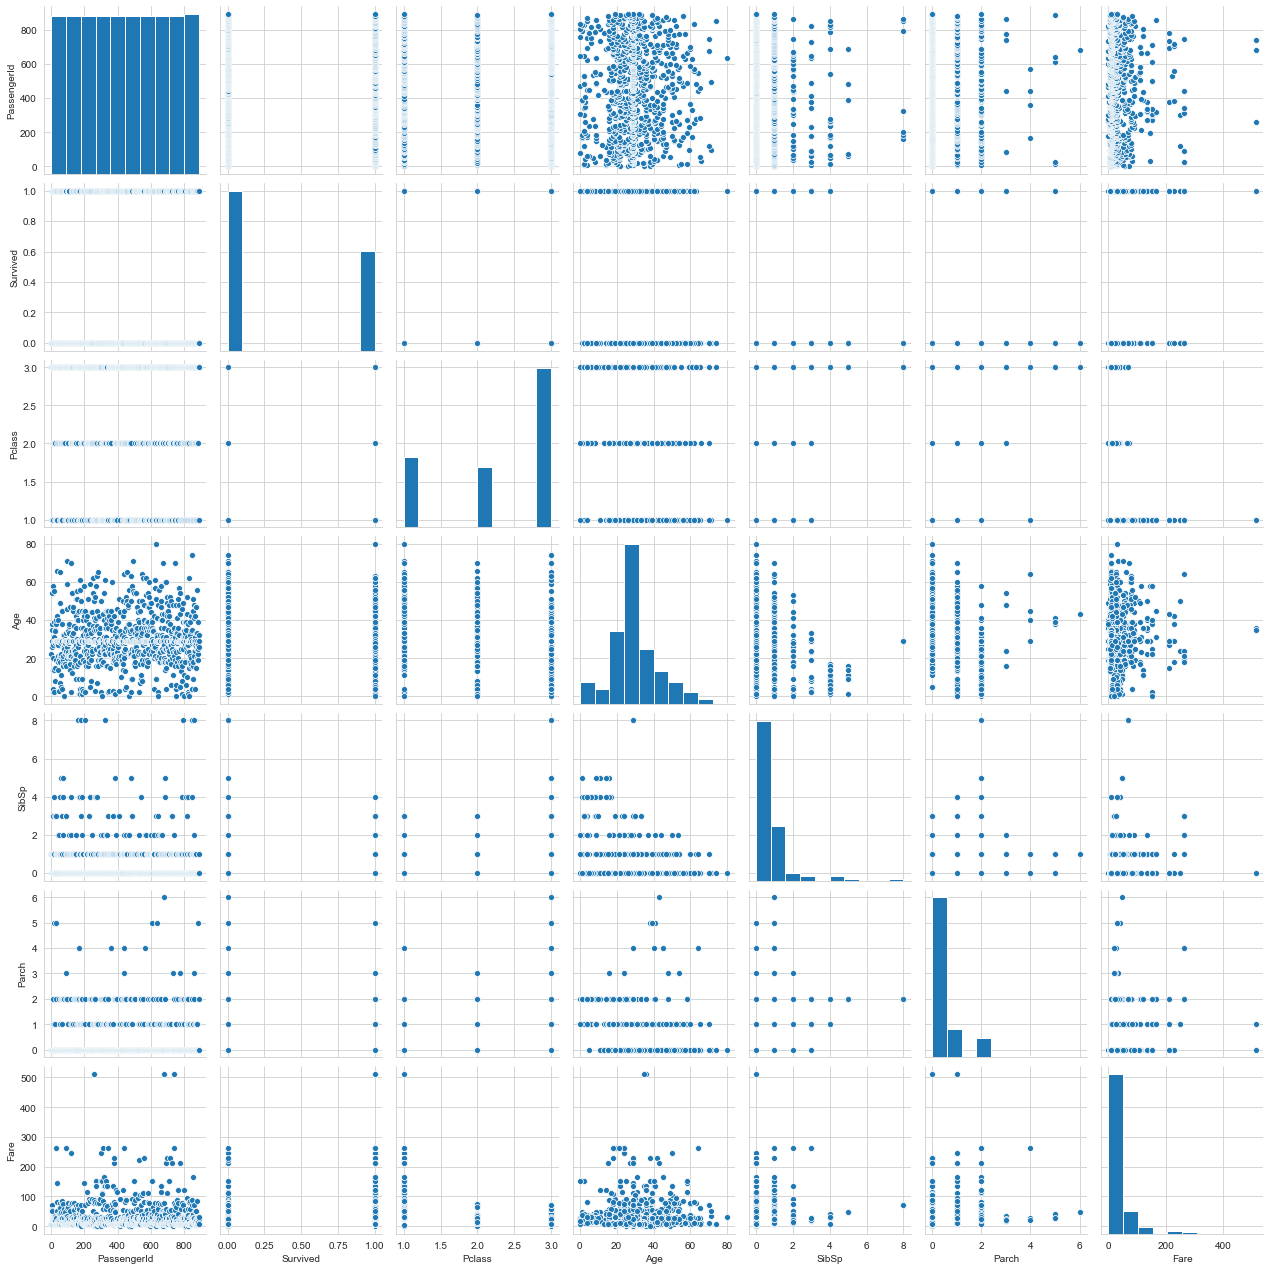

In [36]:
sns.pairplot(df)

# Detecting Outliers

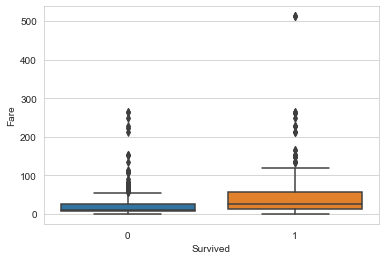

In [37]:
sns.boxplot(x='Survived',y='Fare',data=df)

# Removing Outliers

In [38]:
out=['Age','Fare']

for i in out:
    q25,q75=np.percentile(df[i],[25,75])
    iqr=q75-q25
    minimum=q25-(iqr*3)
    maximum=q75+(iqr*3)
    
df[i].iloc[df[df[i]<minimum].index]=np.nan
df[i].iloc[df[df[i]>maximum].index]=np.nan

df['Age']=df.Age.fillna(df.Age.mean())
df['Fare']=df.Fare.fillna(df.Fare.mean())

In [39]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [40]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [41]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C


In [42]:
le=LabelEncoder()
df.iloc[:, 4]=le.fit_transform(df.iloc[:, 4].values )
df.iloc[:, 10]=le.fit_transform(df.iloc[:, 10].values )

In [43]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,29,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,0


In [44]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [45]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2
5,0,3,1,29,0,0,8.4583,1
6,0,1,1,54,0,0,51.8625,2
7,0,3,1,2,3,1,21.0750,2
8,1,3,0,27,0,2,11.1333,2
9,1,2,0,14,1,0,30.0708,0


In [46]:
x=df.drop('Survived',1)
y=df['Survived']

In [47]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [48]:
x.shape

(891, 7)

In [49]:
y.shape

(891,)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=45)

In [51]:
x_train.shape

(677, 7)

In [52]:
y_train.shape

(677,)

In [53]:
lg=LogisticRegression()

In [54]:
lg.fit(x_train,y_train)

LogisticRegression()

In [55]:
pred=lg.predict(x_test)
print(pred)

[0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1
 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0]


In [56]:
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.822429906542056


In [57]:
print(confusion_matrix(y_test,pred))

[[117  21]
 [ 17  59]]


In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       138
           1       0.74      0.78      0.76        76

    accuracy                           0.82       214
   macro avg       0.81      0.81      0.81       214
weighted avg       0.82      0.82      0.82       214



# AUC ROC Curve

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [60]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.37038985, 0.05277359, 0.79844526, 0.23679716, 0.32313753,
       0.95411073, 0.10497972, 0.09017706, 0.05750862, 0.07463277,
       0.15385247, 0.1342079 , 0.11534173, 0.83215374, 0.14472323,
       0.08095923, 0.14507353, 0.10612891, 0.35654398, 0.42108861,
       0.13991555, 0.11520124, 0.24712384, 0.97821588, 0.64634236,
       0.40070986, 0.15641081, 0.16617333, 0.14289025, 0.15679468,
       0.11539133, 0.13811086, 0.41738912, 0.12656239, 0.61363037,
       0.07078228, 0.66078589, 0.4690605 , 0.09052035, 0.95282751,
       0.68484065, 0.11520124, 0.15064234, 0.10477651, 0.14350271,
       0.12376508, 0.87527829, 0.09419316, 0.81823363, 0.16059897,
       0.66702413, 0.11925903, 0.9091758 , 0.83302313, 0.17118402,
       0.09427824, 0.9163075 , 0.92320031, 0.85798927, 0.07385139,
       0.03704989, 0.863268  , 0.04980236, 0.08699709, 0.05154376,
       0.93295919, 0.10612891, 0.27096798, 0.04587508, 0.10509046,
       0.11520124, 0.17146524, 0.05394582, 0.15706474, 0.09499

In [61]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [62]:
fpr

array([0.        , 0.        , 0.        , 0.00724638, 0.00724638,
       0.01449275, 0.01449275, 0.03623188, 0.03623188, 0.04347826,
       0.04347826, 0.07246377, 0.07246377, 0.07971014, 0.07971014,
       0.0942029 , 0.0942029 , 0.10144928, 0.10144928, 0.10869565,
       0.10869565, 0.11594203, 0.11594203, 0.17391304, 0.17391304,
       0.18115942, 0.18115942, 0.20289855, 0.20289855, 0.25362319,
       0.25362319, 0.3115942 , 0.3115942 , 0.33333333, 0.34782609,
       0.34782609, 0.39855072, 0.39855072, 0.57971014, 0.5942029 ,
       0.60869565, 0.60869565, 0.63043478, 0.66666667, 0.67391304,
       0.67391304, 0.69565217, 0.73188406, 0.74637681, 0.76086957,
       0.76086957, 0.76811594, 0.76811594, 0.78985507, 0.78985507,
       0.82608696, 0.84057971, 0.85507246, 0.85507246, 1.        ])

In [63]:
tpr

array([0.        , 0.01315789, 0.10526316, 0.10526316, 0.46052632,
       0.46052632, 0.52631579, 0.52631579, 0.56578947, 0.56578947,
       0.61842105, 0.61842105, 0.65789474, 0.65789474, 0.67105263,
       0.67105263, 0.69736842, 0.69736842, 0.71052632, 0.71052632,
       0.72368421, 0.72368421, 0.77631579, 0.77631579, 0.78947368,
       0.78947368, 0.80263158, 0.80263158, 0.82894737, 0.82894737,
       0.84210526, 0.84210526, 0.85526316, 0.85526316, 0.86842105,
       0.88157895, 0.88157895, 0.89473684, 0.89473684, 0.89473684,
       0.89473684, 0.90789474, 0.90789474, 0.92105263, 0.92105263,
       0.93421053, 0.93421053, 0.93421053, 0.93421053, 0.93421053,
       0.94736842, 0.94736842, 0.96052632, 0.96052632, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 1.        , 1.        ])

In [64]:
thresholds

array([1.98023048, 0.98023048, 0.95411073, 0.95282751, 0.80098613,
       0.79896237, 0.77747008, 0.75966372, 0.73582306, 0.734134  ,
       0.68511975, 0.66810454, 0.66648305, 0.66597676, 0.66078589,
       0.64634236, 0.64103176, 0.62864183, 0.61565318, 0.61363037,
       0.60932255, 0.60300803, 0.55660473, 0.47064043, 0.46918717,
       0.4690605 , 0.42108861, 0.40354989, 0.37038985, 0.32313753,
       0.30058082, 0.23679716, 0.23037731, 0.20730358, 0.19926864,
       0.17474486, 0.16524734, 0.16277819, 0.12656239, 0.1241614 ,
       0.11925903, 0.11814755, 0.11534173, 0.11520124, 0.11343763,
       0.11313441, 0.11035516, 0.10612891, 0.10509046, 0.10497972,
       0.10477651, 0.10010455, 0.09499585, 0.09419316, 0.09414228,
       0.09017706, 0.08699709, 0.08208984, 0.08161588, 0.02050914])

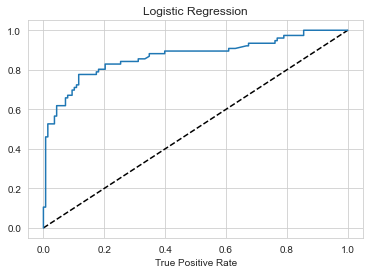

In [65]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [66]:
gnb=GaussianNB()
gnb.fit(x_train, y_train)
pred=gnb.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score: 0.780373831775701
[[106  32]
 [ 15  61]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       138
           1       0.66      0.80      0.72        76

    accuracy                           0.78       214
   macro avg       0.77      0.79      0.77       214
weighted avg       0.80      0.78      0.78       214



In [67]:
svc=SVC(kernel='rbf')
svc.fit(x_train, y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy_score: 0.8411214953271028
[[122  16]
 [ 18  58]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       138
           1       0.78      0.76      0.77        76

    accuracy                           0.84       214
   macro avg       0.83      0.82      0.83       214
weighted avg       0.84      0.84      0.84       214



In [68]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)
preddtc=dtc.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy_score: 0.7242990654205608
[[101  37]
 [ 22  54]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       138
           1       0.59      0.71      0.65        76

    accuracy                           0.72       214
   macro avg       0.71      0.72      0.71       214
weighted avg       0.74      0.72      0.73       214



In [69]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)
predknn=knn.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score: 0.8084112149532711
[[115  23]
 [ 18  58]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       138
           1       0.72      0.76      0.74        76

    accuracy                           0.81       214
   macro avg       0.79      0.80      0.79       214
weighted avg       0.81      0.81      0.81       214



In [70]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)
predrfc=rfc.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

accuracy_score: 0.822429906542056
[[115  23]
 [ 15  61]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       138
           1       0.73      0.80      0.76        76

    accuracy                           0.82       214
   macro avg       0.81      0.82      0.81       214
weighted avg       0.83      0.82      0.82       214



In [71]:
adbc=AdaBoostClassifier(AdaBoostClassifier(base_estimator=None,learning_rate=1.0,n_estimators=100))
adbc.fit(x_train, y_train)
adbc.score(x_train, y_train)
predadbc=rfc.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,predadbc))
print(confusion_matrix(y_test,predadbc))
print(classification_report(y_test,predadbc))

accuracy_score: 0.822429906542056
[[115  23]
 [ 15  61]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       138
           1       0.73      0.80      0.76        76

    accuracy                           0.82       214
   macro avg       0.81      0.82      0.81       214
weighted avg       0.83      0.82      0.82       214



In [72]:
gbc=GradientBoostingClassifier(random_state=0)
gbc.fit(x_train, y_train)
gbc.score(x_train, y_train)
predgbc=gbc.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

accuracy_score: 0.8598130841121495
[[122  16]
 [ 14  62]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       138
           1       0.79      0.82      0.81        76

    accuracy                           0.86       214
   macro avg       0.85      0.85      0.85       214
weighted avg       0.86      0.86      0.86       214



In [73]:
from sklearn.model_selection import cross_val_score
svcscores=cross_val_score(svc, x , y, cv=5)
y_pred=cross_val_score(svc, x , y, cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.82681564 0.81460674 0.80337079 0.79775281 0.85393258]
0.819295712761283 0.019979732932048168


In [74]:
from sklearn.model_selection import cross_val_score
dtcscores=cross_val_score(dtc, x , y, cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.75977654 0.78651685 0.8258427  0.78651685 0.80337079]
0.7924047454648171 0.02178203480064596


In [75]:
from sklearn.model_selection import cross_val_score
knnscores=cross_val_score(knn, x , y, cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.79329609 0.76404494 0.84269663 0.82022472 0.83707865]
0.8114682066411399 0.029281316515206907


In [76]:
from sklearn.model_selection import cross_val_score
gnbscores=cross_val_score(gnb, x , y, cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.70949721 0.75842697 0.7752809  0.80337079 0.79213483]
0.7677421379699956 0.03286481842514493


In [77]:
from sklearn.model_selection import cross_val_score
rfcscores=cross_val_score(rfc, x , y, cv=5)
print(rfcscores)
print(rfcscores.mean(),gnbscores.std())

[0.76536313 0.79775281 0.83707865 0.79213483 0.8258427 ]
0.8036344234511331 0.03286481842514493


In [78]:
from sklearn.model_selection import cross_val_score
adbcscores=cross_val_score(adbc, x , y, cv=5)
print(adbcscores)
print(adbcscores.mean(),adbcscores.std())

[0.77094972 0.7752809  0.8258427  0.84269663 0.80337079]
0.8036281463812692 0.027897472199726943


In [79]:
from sklearn.model_selection import cross_val_score
gbcscores=cross_val_score(adbc, x , y, cv=5)
print(gbcscores)
print(gbcscores.mean(),gbcscores.std())

[0.77094972 0.7752809  0.8258427  0.84269663 0.80337079]
0.8036281463812692 0.027897472199726943


In [80]:
import joblib
joblib.dump(gbc, 'gbc_df.pkl')

['gbc_df.pkl']